In [43]:
import numpy as np
import pandas as pd
from sklearn import tree

In [32]:
input_file = "~/Desktop/DS/MLCourse/PastHires.csv"
df = pd.read_csv(input_file, header = 0)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [33]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [44]:
features = list(df.columns[:6])
y = df["Hired"]
x = df[features]
# Form and fit our decision tree to the now-encoded data
classifier = tree.DecisionTreeClassifier()
dtree = classifier.fit(x, y)

In [45]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

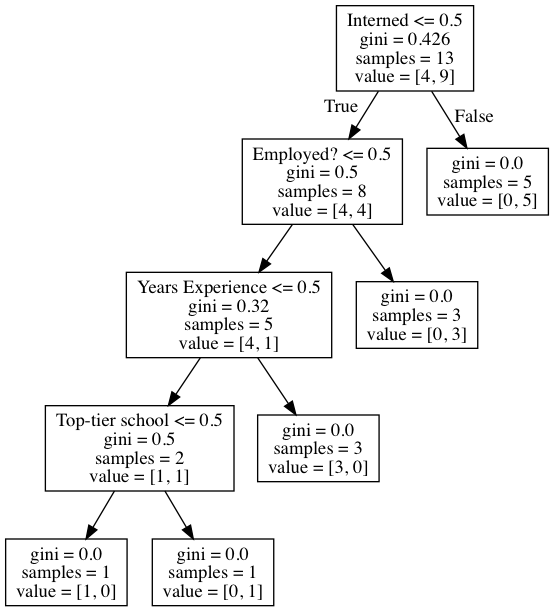

In [48]:
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())